In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy import stats 
import string
import seaborn as sns
sns.set_style()

plt.rcParams.update({
    #"text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.rc('text.latex', preamble=r'\usepackage{color}')
smallfs = 8
bigfs = 10

plt.rcParams.update({'font.size': bigfs, 'axes.titlesize':bigfs})
plt.rc('axes', labelsize=bigfs)    # fontsize of the x and y labels
plt.rc('legend',fontsize=smallfs)
plt.rc('xtick', labelsize=smallfs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=smallfs)    # fontsize of the tick labels



In [2]:
from model import epsarrs, nuarrs
print(epsarrs["SA"], nuarrs["SA"])

# should be [0.05, 0.175, 0.3] [0.05, 0.08, 0.13, 0.2]

[0.05, 0.175, 0.3] [0.05, 0.08, 0.13, 0.2]


In [3]:
nu=0.08
bc = 0.175
ic = "2G-6AM"
seeds=[1,7, 5,6]
cmap = plt.get_cmap("magma_r")
cmap.set_under("gainsboro")
def plot(nu, bc, ic, seeds):
    bins = np.linspace(0,1,41)
    fig, axs = plt.subplots(1,len(seeds), figsize=(16/2.54, 6/2.54), sharex=True, sharey=True)
    noise_type = "ambiguity"
    for ax, seed in zip(axs.flatten(), seeds):
        a = xr.open_dataset(f"../../data/ms2_noise-in-OD/model-{noise_type}Noise_singleRes_{ic}Initial_eps{bc:.3f}_seeds0-9.ncdf", engine="netcdf4")
        m = a.sel({"bc":bc, "nu":nu, "mu":a.mu, "seed":seed, "t":[k*1e4 for k in np.arange(1,10)]}).x.mean(dim="id").values[0]
        ss = a.sel({"bc":bc, "nu":nu, "mu":a.mu, "seed":seed, "t":[k*1e4 for k in np.arange(1,10)]}).x.std(dim="id").values[0]
        print(f"mean op, seed {seed}: {[f'{mm:.3f}' for mm in m]}")
        print(f"std dev op, seed {seed}: {[f'{sss:.3f}' for sss in ss]}")
        heatm = [] 
        for t in a.t:
            c, b = np.histogram(a.sel({"bc":bc, "nu":nu, "mu":a.mu, "seed":seed, "t":t}).x, bins=bins)
            heatm.append(c)
        X, Y = np.meshgrid(a.t.values, bins[:-1]+np.diff(bins)[0]/2)
        ax.pcolormesh(X, Y, np.array(heatm).T, cmap="magma_r", shading="nearest", vmin=1)
        
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_title("")
        ax.set_xscale("log")
        ax.set_xlim(10,1e5)
        #ax.set_title(f"{noise_type} noise", fontsize=bigfs)
        #ax.set_xticks([0,2e4,4e4,6e4,8e4, 1e5])
        #ax.set_xticklabels(["0","0.2e5","0.4e5","0.6e5","0.8e5", "1e5"])
    #axs[0].set_ylim(0,1)
    axs[0].set_yticks([0,0.5,1])
    axs[0].set_xlim(1000,1e5)
   
    letters = string.ascii_lowercase[:6]
    for n, ax in enumerate(axs):
        ax.set_xlabel(r"time $t$", fontsize=bigfs, x=1 if len(seeds)==4 else 0.5)
        yLabel = 1.03
        ax.text(-0.01, yLabel, rf"({letters[n]})", style="italic", color="k", fontsize=bigfs, va="bottom", ha="left", transform=ax.transAxes)

    #axs[0].set_xlabel(r"time $t$", fontsize=bigfs)
    axs[0].set_ylabel(r"opinion space", fontsize=bigfs)

    return fig, axs

In [4]:
# nu=0.08
# bc = 0.175
# ic = "2G-6AM"
# ictext = "calibrated initial opinions (see figure 3)"
# seeds=[1,7, 5,6]
# fig, axs = plot(nu, bc, ic, seeds)
# axs[1].set_title(fr"Simulations with $\epsilon={bc:.3f}$ and $\nu={nu:.2f}$, {ictext}", fontsize=bigfs, x=1, y=1.1)
# fig.subplots_adjust(top=0.87, right=0.97, left=0.1, bottom=0.12, hspace=0.05, wspace=0.18)

# plt.savefig(f"figs/singles_ambiguity-4Seeds_{ic}_bc{bc:.3f}-nu{nu:.3f}_4seeds_hist2D.png", dpi=600)    

mean op, seed 1: ['0.628', '0.695', '0.645', '0.771', '0.743', '0.791', '0.822', '0.832', '0.786']
std dev op, seed 1: ['0.241', '0.245', '0.193', '0.076', '0.067', '0.061', '0.049', '0.047', '0.054']
mean op, seed 3: ['0.625', '0.613', '0.527', '0.512', '0.461', '0.496', '0.458', '0.429', '0.501']
std dev op, seed 3: ['0.052', '0.061', '0.059', '0.061', '0.055', '0.056', '0.049', '0.053', '0.054']
mean op, seed 6: ['0.724', '0.732', '0.725', '0.711', '0.690', '0.701', '0.741', '0.765', '0.813']
std dev op, seed 6: ['0.192', '0.141', '0.143', '0.146', '0.126', '0.124', '0.112', '0.126', '0.134']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


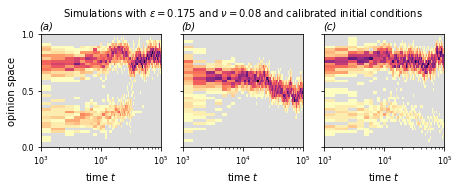

In [5]:
nu=0.08
bc = 0.175
ic = "2G-6AM"
text =""# " ($a_5$ in figure 3$a$)"
ictext = "and calibrated initial conditions"
seeds=[1,3, 6]  
fig, axs = plot(nu, bc, ic, seeds)
axs[1].set_title(fr"Simulations with $\epsilon={bc:.3f}$ and $\nu={nu:.2f}${text} {ictext}", fontsize=bigfs, x=1 if len(seeds)==4 else 0.5, y=1.1)
fig.subplots_adjust(top=0.84, right=0.97, left=0.08, bottom=0.175, hspace=0.05, wspace=0.18)

plt.savefig(f"figs/singles_ambiguity-3Seeds_{ic}_bc{bc:.3f}-nu{nu:.3f}_hist2D.png", dpi=600)    
plt.savefig(f"figs/singles_ambiguity-3Seeds_{ic}_bc{bc:.3f}-nu{nu:.3f}_hist2D.pdf")    